In [1]:
%load_ext autoreload
%autoreload 2
from Tools import *

C:\Users\mario\anaconda3\envs\tesi\lib\site-packages\pyproj\__init__.py:91: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


In [2]:
from glob import glob
import pysplit
import os

def run_hysplit(basename, years, months, days, hours, altitudes, location, runtime):
    working_dir = f'C:\hysplit\working'
    storage_dir = f'{os.getcwd()}{os.sep}data{os.sep}step_3_data_output{os.sep}traj'
    meteo_dir = f'{os.getcwd()}{os.sep}data{os.sep}step_3_data_input{os.sep}gdas1'
    pysplit.generate_bulktraj(basename, working_dir, storage_dir, meteo_dir,
                              years, months, hours, altitudes, location, runtime,
                              monthslice=days, get_reverse=True,
                              get_clipped=False, hysplit="C:\\hysplit\\exec\\hyts_std")
    
def visualize_trajectories(basename):
    filenames = glob(f"data/step_3_data_output/traj/{basename}*")
    trajgroup = pysplit.make_trajectorygroup(filenames)
    for traj in trajgroup:
        altitude0 = traj.data.geometry.apply(lambda p: p.z)[0]
        traj.trajcolor = color_dict[altitude0]
    fig, ax = plt.subplots(figsize=(10, 10))
    # First graph, cropout and area
    basemap = viz_init(ax)
    for traj in trajgroup:
        basemap.plot(*traj.path.xy, c=traj.trajcolor, latlon=True, zorder=20)
    traj_coords = np.concatenate([np.array(list(zip(x.path.xy[0], x.path.xy[1]))) for x in trajgroup])
    # print(traj_coords)
    # basemap.hexbin(traj_coords[:,0], traj_coords[:,1],cmap=plt.cm.jet)
    display(basemap)
    
def run_and_visualize_hysplit(basename, years, months, days, hours, altitudes, location, runtime):
    if isinstance(location, list):
        for idx, loc in enumerate(tqdm(location)):
            basename_2 = basename + "_" + str(idx)
            filenames = glob(f"data/step_3_data_output/traj/{basename_2}*")
            [os.remove(file) for file in filenames]
            run_hysplit(basename_2, years, months, days, hours, altitudes, loc, runtime)
    else:
        filenames = glob(f"data/step_3_data_output/traj/{basename}*")
        [os.remove(file) for file in filenames]
        run_hysplit(basename, years, months, days, hours, altitudes, location, runtime)
    visualize_trajectories(basename)
    
color_dict = {5.0 : 'blue',
              10.0 : 'orange',
              20.0 : 'red'}

In [4]:
stazioni = pd.read_csv("data/step_1_data_output/stazioni_enriched.csv")

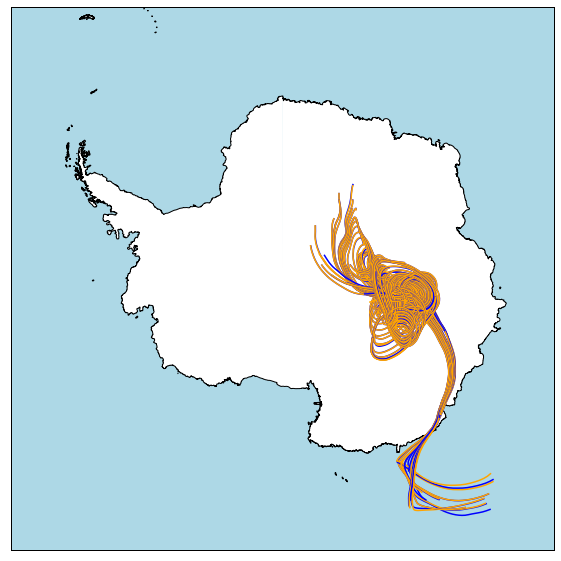

In [41]:
run_and_visualize_hysplit(basename = "test_1",
                          years = [2021], 
                          months = [8],
                          days = slice(1, 31, 1),
                          hours = [0, 6, 12, 18], 
                          altitudes=[5, 10],
                          location=(stazioni.latitude.values[0], stazioni.longitude.values[0]), 
#                           location=list(zip(stazioni.latitude, stazioni.longitude)), 
                          runtime=-120)

In [44]:
filenames = glob(f"data/step_3_data_output/traj/test_1*")
trajgroup = pysplit.make_trajectorygroup(filenames)

In [45]:
traj_coords = np.concatenate([np.array(list(zip(x.path.xy[0], x.path.xy[1]))) for x in trajgroup])

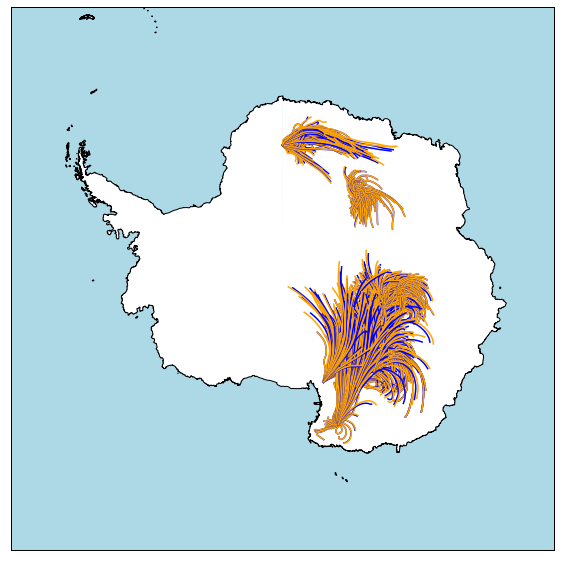

In [35]:
visualize_trajectories("test_1")

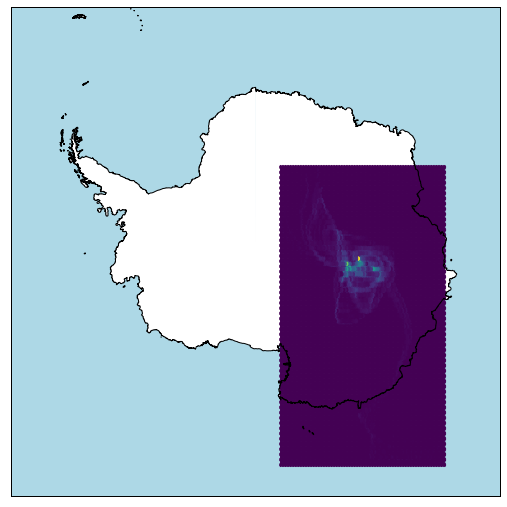

In [46]:
fig, ax = plt.subplots(figsize=(16, 9))
m = viz_init(axes=ax)
viz_x, viz_y = m(traj_coords[:, 0], traj_coords[:, 1])
m.hexbin(viz_x, viz_y, ax=ax)